# Customer Segmentation ML Project Using K-Means Clustering Algorithm

**Customer segmentation** is the process of dividing a company's customer base into distinct groups or segments based on shared characteristics, behaviors, or needs. The purpose of segmentation is to better understand the diverse customer population and create targeted marketing strategies to meet the specific requirements of each segment. By identifying groups with similar traits, businesses can tailor their products, services, and communication efforts to maximize customer satisfaction and enhance overall marketing effectiveness.

Here are some key points about customer segmentation:

**1. Grouping Customers:** Customer segmentation involves categorizing customers into meaningful groups based on common characteristics or behaviors. These groups may include demographic factors (age, gender, location), psychographic traits (interests, values, lifestyles), purchasing behaviors (frequency, amount), or any other relevant attributes.

**2. Understanding Customer Differences:** The main objective of segmentation is to recognize that not all customers are the same. By understanding the unique needs, preferences, and behaviors of different customer groups, businesses can create targeted marketing strategies that resonate with each segment.

**3. Tailored Marketing Strategies:** Once customer segments are identified, businesses can develop tailored marketing strategies for each group. This may involve customizing product offerings, messaging, promotions, pricing, distribution channels, and customer support to align with the preferences and characteristics of each segment.

**4. Improved Customer Experience:** Customer segmentation enables companies to deliver personalized experiences to their customers. By understanding individual segments' pain points, motivations, and preferences, businesses can create relevant and engaging interactions, leading to higher customer satisfaction and loyalty.

**5. Efficient Resource Allocation:** Customer segmentation helps businesses allocate their resources more effectively. By focusing on the most valuable segments, companies can prioritize their marketing efforts, optimize budget allocation, and achieve better returns on investment.

**6. Market Expansion Opportunities:** Segmentation can also help identify untapped market segments or new customer groups that may have been overlooked. By understanding the diverse needs and characteristics of potential customers, businesses can expand their market reach and target previously unaddressed segments.

## Table of Contents
1. [Importing dependencies](#p1)
2. [Data Assessment](#p2)
2. [Exploratory data analysis](#p3)
3. [Feature Selection](#p4)
4. [Model Building](#p5)
   * [Choosing the number of clusters using The Elbow Point Graph and Silouette Score](#p5-1)
   * [Training and Fitting the k-Means Clustering Model](#p5-2)
   * [Prediction](#p5-2)
   * [Visualizing all the Clusters](#p5-3)
6. [Conclusion](#p6)

# 1. Data Gathering 

#### Importing necessary labraries

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score 

In [15]:
df = pd.read_csv('Mall_Customers.csv')

# 2. Data Assessing 

In [16]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [17]:
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [18]:
df.shape

(200, 5)

In [19]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [20]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [22]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [23]:
df.duplicated().sum()

0

# 3. Data Analysis and Exploration 

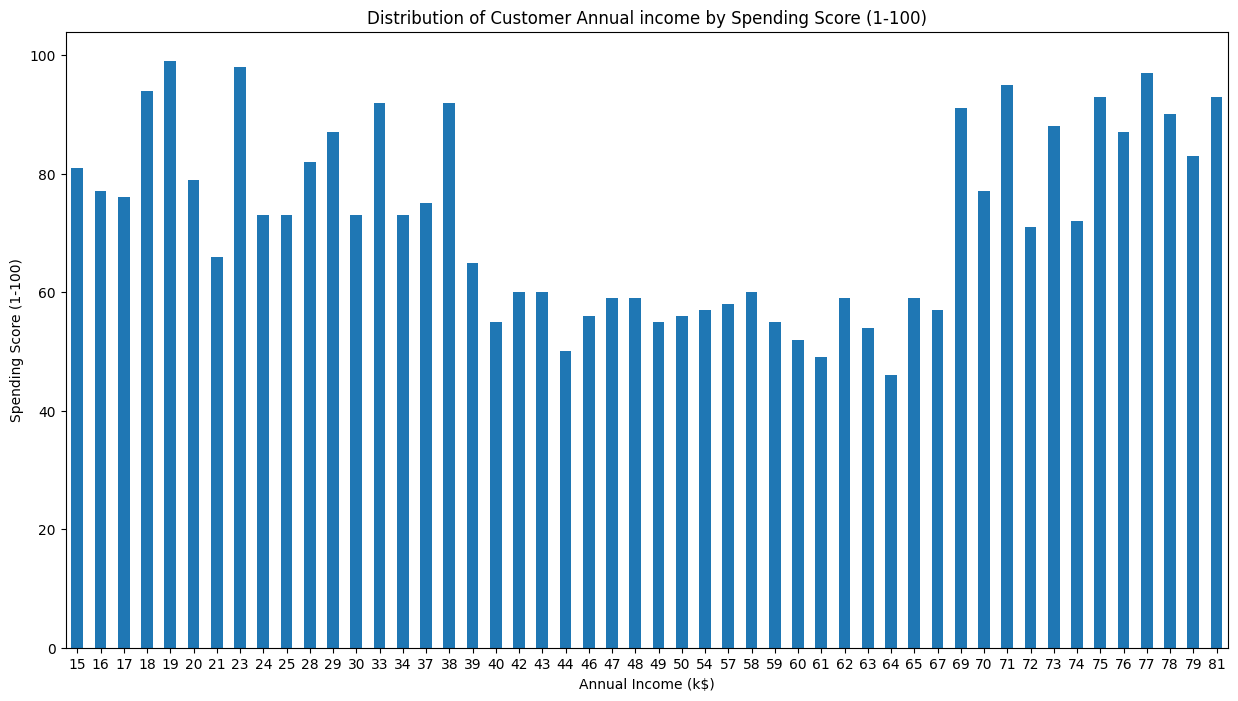

In [24]:
df.groupby('Annual Income (k$)')['Spending Score (1-100)'].max(10).head(50).plot(kind = 'bar', figsize = (15,8))
plt.title('Distribution of Customer Annual income by Spending Score (1-100)')
plt.ylabel('Spending Score (1-100)')
plt.xticks(rotation = 0);

### Exploring Correlation between features

### Exploring the Displot density distribution of features 

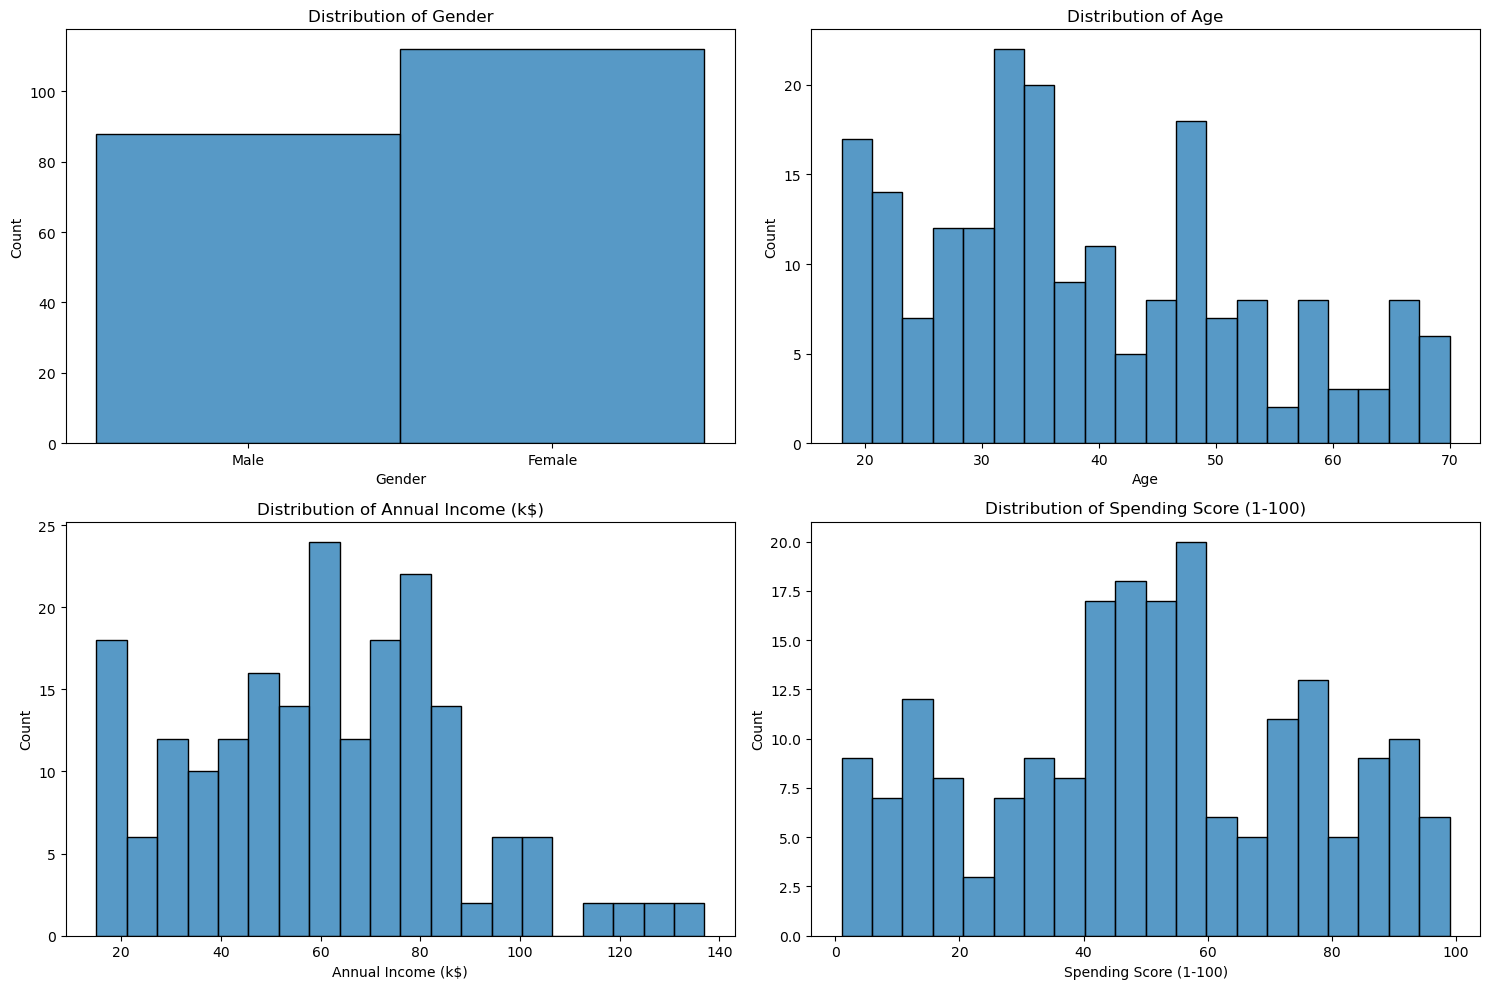

In [ ]:
plt.figure(figsize=(15, 10))

columns = ['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']
n = len(columns)

for i, column in enumerate(columns, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[column], bins=20)
    plt.title('Distribution of {}'.format(column))
    plt.xlabel(column)

plt.tight_layout()
plt.show()

### Exploring the Distribution of Gender in the Customer Data

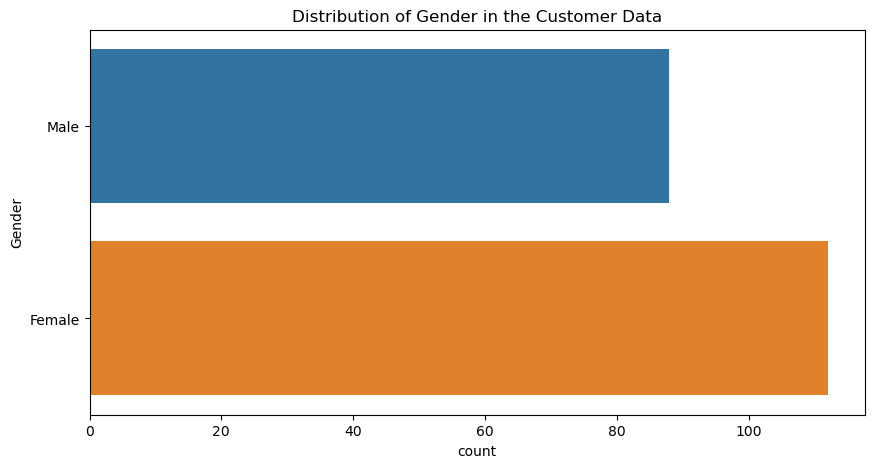

In [ ]:
plt.figure(1, figsize = (10,5))
sns.countplot(y = 'Gender', data = df)
plt.title('Distribution of Gender in the Customer Data')
plt.show()

### Exploring the distribution of features by Customer Gender

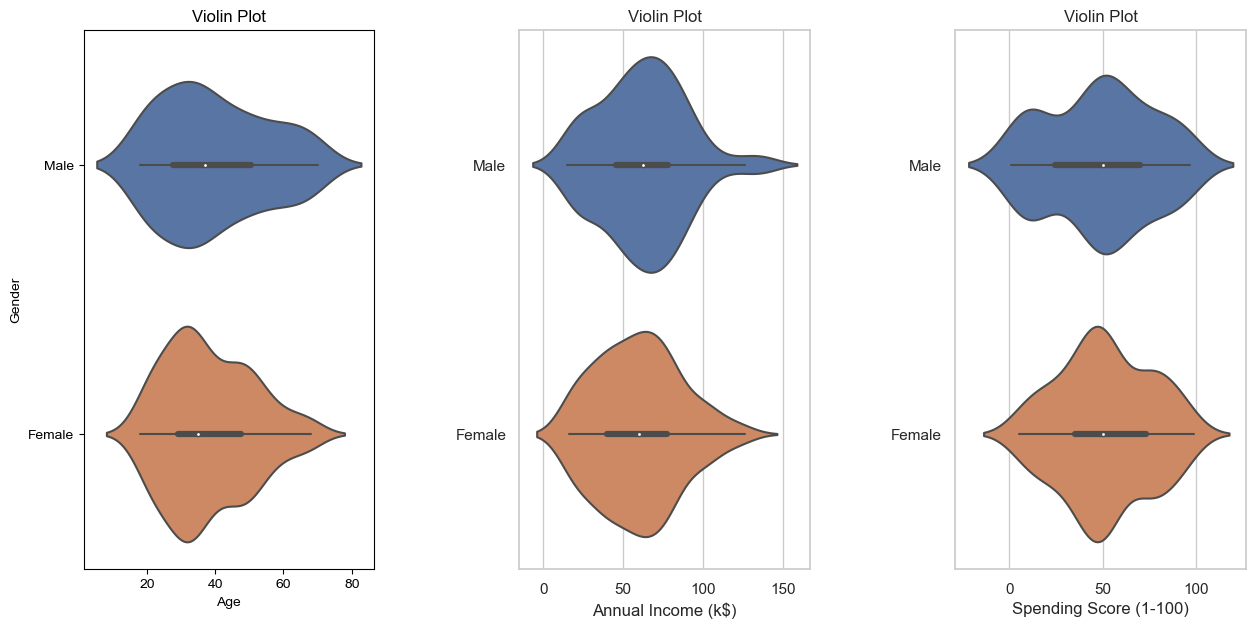

In [ ]:
plt.figure(1, figsize = (15,7))
n = 0
for cols in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1, 3, n)
    sns.set(style = 'whitegrid')
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
    sns.violinplot(x = cols, y = 'Gender', data = df)
    plt.ylabel('Gender' if n == 1 else '')
    plt.title('Violin Plot')
plt.show()

### Exploring the Number of Customers by Customer Age

In [ ]:
age_18_25 = df.Age[(df.Age>= 18) & (df.Age<= 25)]
age_26_35 = df.Age[(df.Age>= 26) & (df.Age<= 35)]
age_36_45 = df.Age[(df.Age>= 36) & (df.Age<= 45)]
age_46_55 = df.Age[(df.Age>= 46) & (df.Age<= 55)]
age_55_above = df.Age[df.Age>= 56]

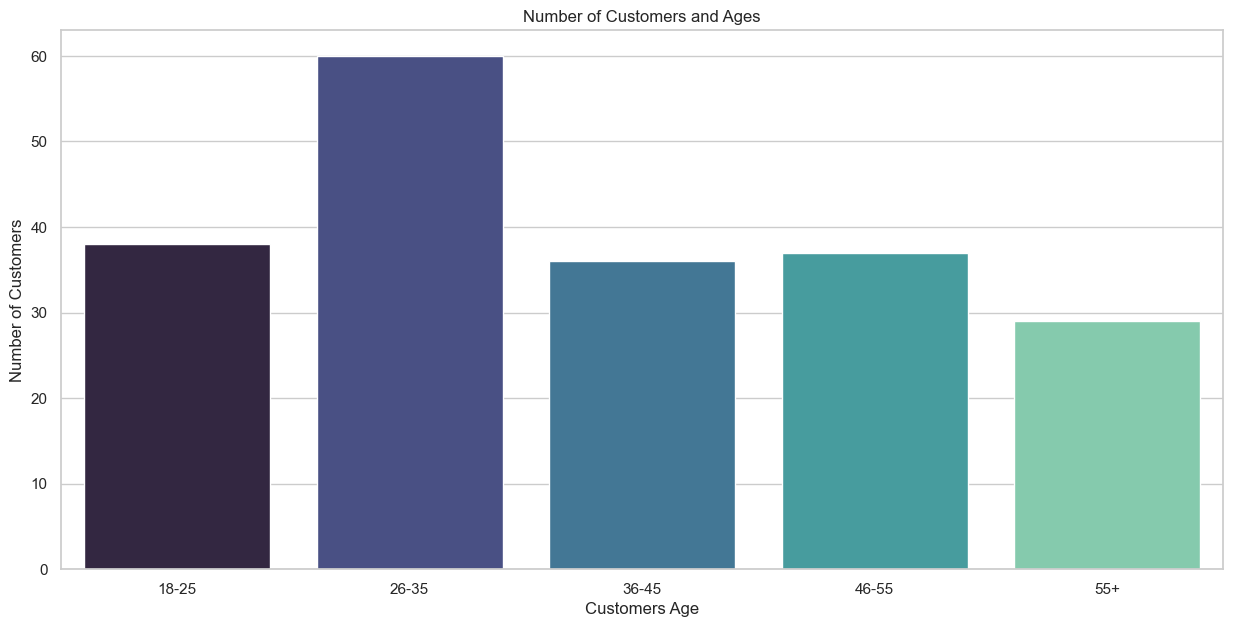

In [ ]:
agex = ['18-25', '26-35', '36-45','46-55', '55+']
agey = [len(age_18_25.values), len(age_26_35.values), len(age_36_45.values), len(age_46_55.values), len(age_55_above.values)]


plt.figure(1, figsize = (15,7))
sns.barplot(x = agex, y = agey, palette = 'mako')
plt.ylabel('Number of Customers')
plt.xlabel('Customers Age')
plt.title('Number of Customers and Ages')
plt.show()

### Exploring the relationship between Annual Income (k$) and Spending Score (1-100)

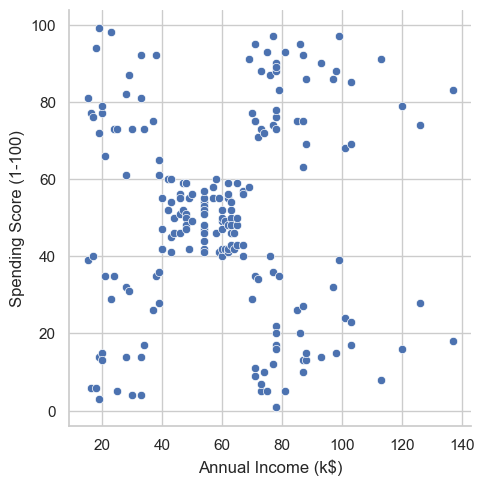

In [ ]:
sns.relplot(x = 'Annual Income (k$)', y = 'Spending Score (1-100)', data = df)

### Exploring Spending Scores by Number of Customers

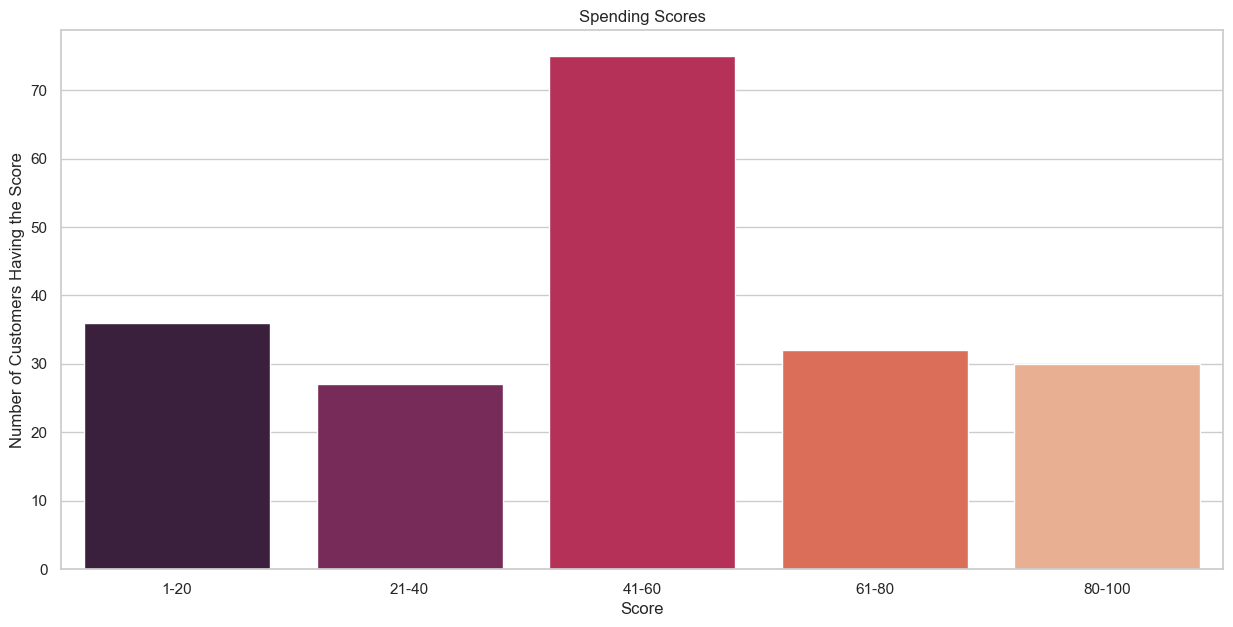

In [ ]:
ss_1_20 = df['Spending Score (1-100)'][(df['Spending Score (1-100)'] >= 1) & (df['Spending Score (1-100)'] <= 20)]
ss_21_40 = df['Spending Score (1-100)'][(df['Spending Score (1-100)'] >= 21) & (df['Spending Score (1-100)'] <= 40)]
ss_41_60 = df['Spending Score (1-100)'][(df['Spending Score (1-100)'] >= 41) & (df['Spending Score (1-100)'] <= 60)]
ss_61_80 = df['Spending Score (1-100)'][(df['Spending Score (1-100)'] >= 61) & (df['Spending Score (1-100)'] <= 80)]
ss_81_100 = df['Spending Score (1-100)'][(df['Spending Score (1-100)'] >= 81) & (df['Spending Score (1-100)'] <= 100)]


ssx = ['1-20', '21-40', '41-60','61-80', '80-100']
ssy = [len(ss_1_20.values), len(ss_21_40.values), len(ss_41_60.values), len(ss_61_80.values), len(ss_81_100.values)]


plt.figure(1, figsize = (15,7))
sns.barplot(x = ssx, y = ssy, palette = 'rocket')
plt.ylabel('Number of Customers Having the Score')
plt.xlabel('Score')
plt.title('Spending Scores')
plt.show()

### Exploring Annual Income by Number of Customers

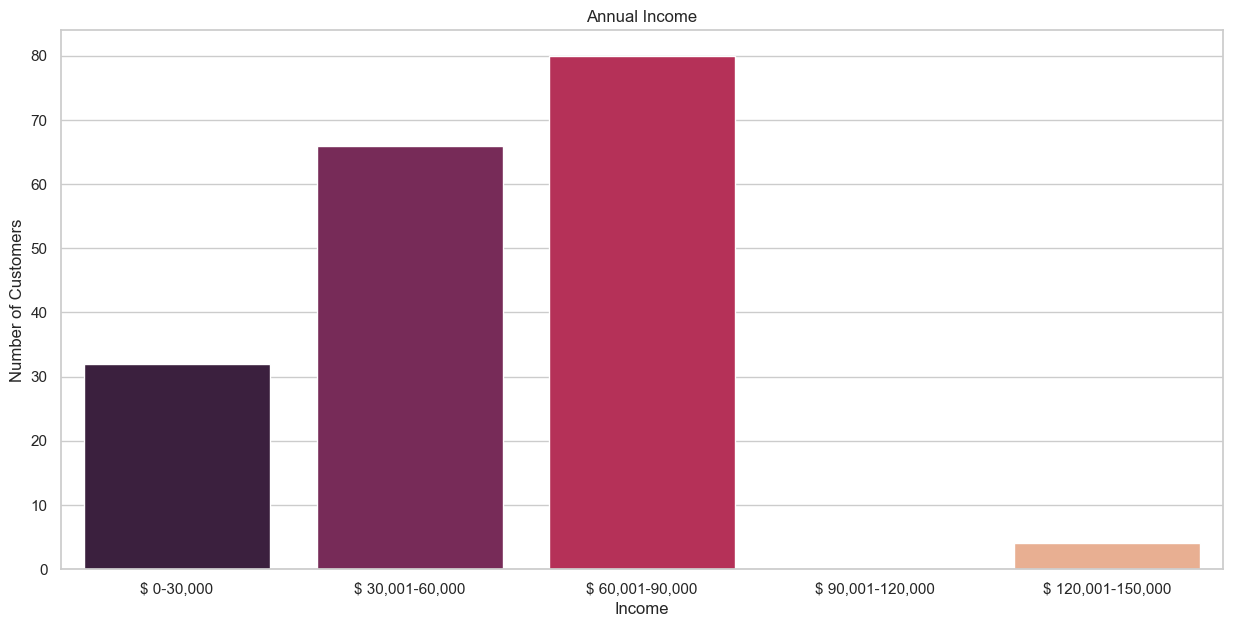

In [ ]:
ai_10_30 = df['Annual Income (k$)'][(df['Annual Income (k$)'] >= 10) & (df['Annual Income (k$)'] <= 30)]
ai_31_60 = df['Annual Income (k$)'][(df['Annual Income (k$)'] >= 31) & (df['Annual Income (k$)'] <= 60)]
ai_61_90 = df['Annual Income (k$)'][(df['Annual Income (k$)'] >= 61) & (df['Annual Income (k$)'] <= 90)]
ai_191_120 = df['Annual Income (k$)'][(df['Annual Income (k$)'] >= 191) & (df['Annual Income (k$)'] <= 120)]
ai_121_150 = df['Annual Income (k$)'][(df['Annual Income (k$)'] >= 121) & (df['Annual Income (k$)'] <= 150)]

aix = ['$ 0-30,000', '$ 30,001-60,000', '$ 60,001-90,000','$ 90,001-120,000', '$ 120,001-150,000']
aiy = [len(ai_10_30.values), len(ai_31_60.values), len(ai_61_90.values), len(ai_191_120.values), len(ai_121_150.values)]


plt.figure(1, figsize = (15,7))
sns.barplot(x = aix, y = aiy, palette = 'rocket')
plt.ylabel('Number of Customers')
plt.xlabel('Income')
plt.title('Annual Income')
plt.show()

# 4. Feature Selection
# Dividing Customers based on Age and Spending Score

In [ ]:
x = df.loc[:, ["Age", "Spending Score (1-100)"]].values

In [ ]:
x

array([[19, 39],
       [21, 81],
       [20,  6],
       [23, 77],
       [31, 40],
       [22, 76],
       [35,  6],
       [23, 94],
       [64,  3],
       [30, 72],
       [67, 14],
       [35, 99],
       [58, 15],
       [24, 77],
       [37, 13],
       [22, 79],
       [35, 35],
       [20, 66],
       [52, 29],
       [35, 98],
       [35, 35],
       [25, 73],
       [46,  5],
       [31, 73],
       [54, 14],
       [29, 82],
       [45, 32],
       [35, 61],
       [40, 31],
       [23, 87],
       [60,  4],
       [21, 73],
       [53,  4],
       [18, 92],
       [49, 14],
       [21, 81],
       [42, 17],
       [30, 73],
       [36, 26],
       [20, 75],
       [65, 35],
       [24, 92],
       [48, 36],
       [31, 61],
       [49, 28],
       [24, 65],
       [50, 55],
       [27, 47],
       [29, 42],
       [31, 42],
       [49, 52],
       [33, 60],
       [31, 54],
       [59, 60],
       [50, 45],
       [47, 41],
       [51, 50],
       [69, 46],
       [27, 51

# 5. Model Building
## Training the k-Means Clustering Model
### Choosing the number of clusters
#### WCSS  ->  Within Clusters Sum of Squares
finding wcss value for different number of clusters

## Determining the value of k 
### 1. silhouette score
### 2. Elbow Method

In [ ]:
wcss = []   
k_values = range(2, 11)

# Iterate over each value of k
for k in k_values:
    # Fit K-means clustering model
    kmeans = KMeans(n_clusters=k,init='k-means++', random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    # Obtain cluster labels for the data points
    labels = kmeans.labels_
    # Calculate the silhouette score for the clustering solution
    silhouette_avg = silhouette_score(x, labels)
    
    print(f"For k={k}, the silhouette score is: {silhouette_avg}")

C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For k=2, the silhouette score is: 0.4692341232501655


C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For k=3, the silhouette score is: 0.45300127016521263
For k=4, the silhouette score is: 0.49973941540141753


C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable 

For k=5, the silhouette score is: 0.43350225495428363
For k=6, the silhouette score is: 0.4376965763059772


C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable 

For k=7, the silhouette score is: 0.42313509747504796
For k=8, the silhouette score is: 0.43215030177487107
For k=9, the silhouette score is: 0.41485342159923116


C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable 

For k=10, the silhouette score is: 0.4141899863508767


## 2.  Applying Elbow Method

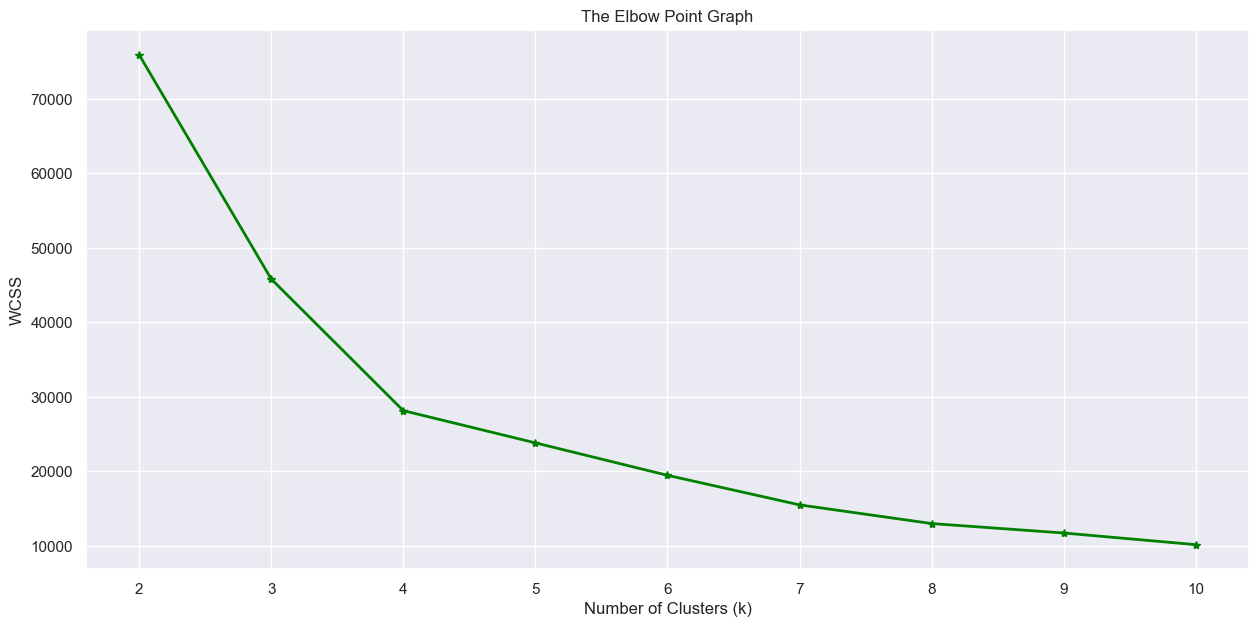

In [ ]:
# plot an elbow graph
plt.figure(1, figsize = (15,7))
sns.set()
plt.plot(range(2,11), wcss, linewidth = 2, color = 'green', marker = '*')
plt.title('The Elbow Point Graph')
plt.xlabel("Number of Clusters (k)")
plt.ylabel('WCSS')
plt.show()

# Prediction

In [ ]:
# Optimum Number of Clusters = 4
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0)

# return a label for each data point based on their cluster
Y_label = kmeans.fit_predict(x)

print(Y_label)

[2 1 0 1 2 1 0 1 0 1 0 1 0 1 0 1 2 2 0 1 2 1 0 1 0 1 0 2 0 1 0 1 0 1 0 1 0
 1 0 1 3 1 3 2 0 2 3 2 2 2 3 2 2 3 3 3 3 3 2 3 3 2 3 3 3 2 3 3 2 2 3 3 3 3
 3 2 3 2 2 3 3 2 3 3 2 3 3 2 2 3 3 2 3 2 2 2 3 2 3 2 2 3 3 2 3 2 3 3 3 3 3
 2 2 2 2 2 3 3 3 3 2 2 2 1 2 1 3 1 0 1 0 1 2 1 0 1 0 1 0 1 0 1 2 1 0 1 3 1
 0 1 0 1 0 1 0 1 0 1 0 1 3 1 0 1 0 1 0 1 0 2 0 1 0 1 0 1 0 1 0 1 0 1 0 1 2
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]


C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


# Visualizing all the Clusters

#### 1. We check for clusters grouping and number of Customers in each Group

In [ ]:
kmeans_clusters = KMeans(n_clusters=4, init='k-means++', random_state=42).fit(x)
kms_clustered = pd.DataFrame(x, columns=["Age", "Spending Score (1-100)"]) 
kms_clustered['Cluster'] = kmeans_clusters.labels_ + 1  # Add 1 to cluster labels

kmeans_cluster_size = kms_clustered.groupby('Cluster').size().to_frame()
kmeans_cluster_size.columns = ['No. of Customer']

C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [ ]:
kms_clustered

,Age,Spending Score (1-100),Cluster
0,19,39,4
1,21,81,3
2,20,6,2
3,23,77,3
4,31,40,4
...,...,...,...
195,35,79,3
196,45,28,2
197,32,74,3
198,32,18,2


In [ ]:
kmeans_cluster_size

,No. of Customer
Cluster,
1,48
2,48
3,57
4,47


#### 2. plotting all the clusters and their Centroids to check for distribution and basic information of all the customer types we have the data

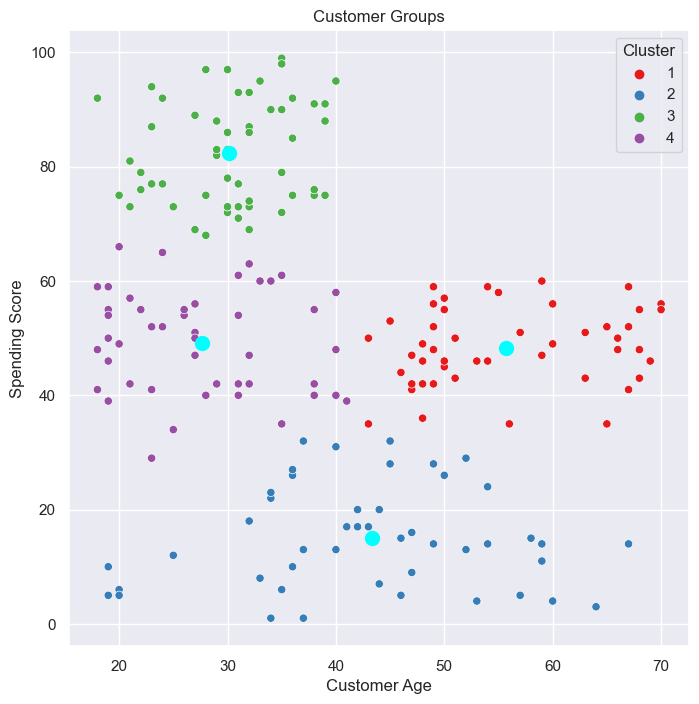

In [ ]:
# 4 Clusters -  1, 2, 3, 4
plt.figure(figsize=(8, 8))
sns.scatterplot(x='Age', y='Spending Score (1-100)', hue='Cluster', data=kms_clustered, legend = 'full', palette = 'Set1')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='cyan', label='Centroids')

plt.title('Customer Groups')
plt.xlabel('Customer Age')
plt.ylabel('Spending Score')
plt.show()


### Customer Clusters based on Aannual Income and Spending Score
K-Means Algorithm generated the following 4 clusters

**cluster 1 (Red color):** Customers with **high** Age(42-70) and **medium** Spending Scores(35-60)

**cluster 2 (Blue color):** Customers with **medium** Age(70-135) and **low** Spending Scores(60-100)

**cluster 3 (Green color):** Customers with **low** Age(18-40) and **high** Spending Scores(65-100)

**cluster 4 (Purple color):** Customers with **low** Age(18-42) and **medium** Spending Scores(30-65)


#### 3. Going Futher to Plot the clusters with customer type labels

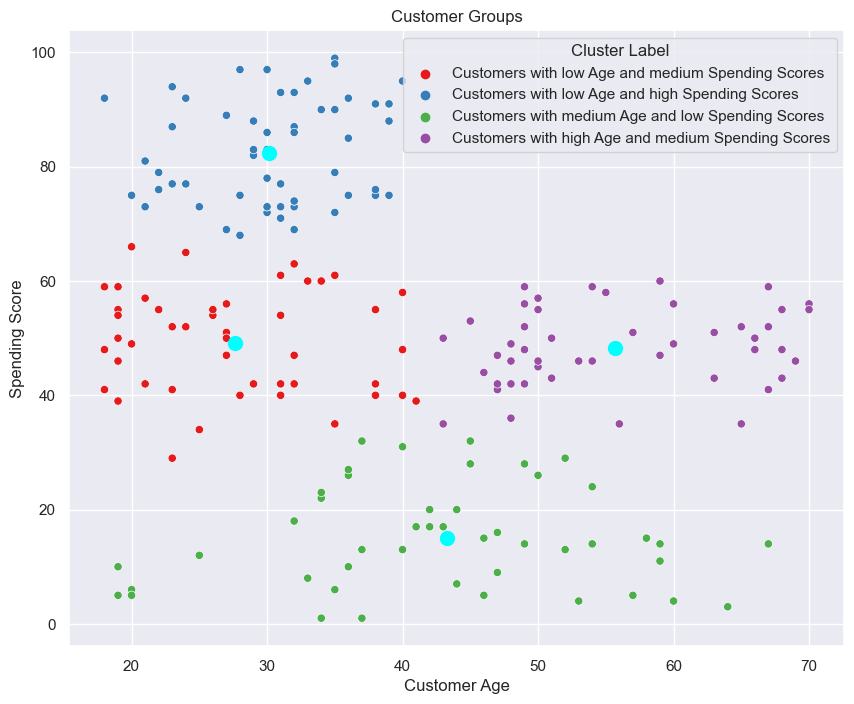

In [ ]:
# Define cluster labels
cluster_labels = {
    1: 'Customers with high Age and medium Spending Scores',
    2: 'Customers with medium Age and low Spending Scores',
    3: 'Customers with low Age and high Spending Scores',
    4: 'Customers with low Age and medium Spending Scores'
}

# Assign cluster labels to the DataFrame
kms_clustered['Cluster Label'] = kms_clustered['Cluster'].map(cluster_labels)

# Plotting all the clusters and their centroids
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Age', y='Spending Score (1-100)', hue='Cluster Label', data=kms_clustered, legend='full', palette='Set1')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='cyan', label='Centroids')

plt.title('Customer Groups')
plt.xlabel('Customer Age')
plt.ylabel('Spending Score')
plt.show()


#### 4. Finally we plot I donut chart to visualize the distribution of Customer types we have in the data

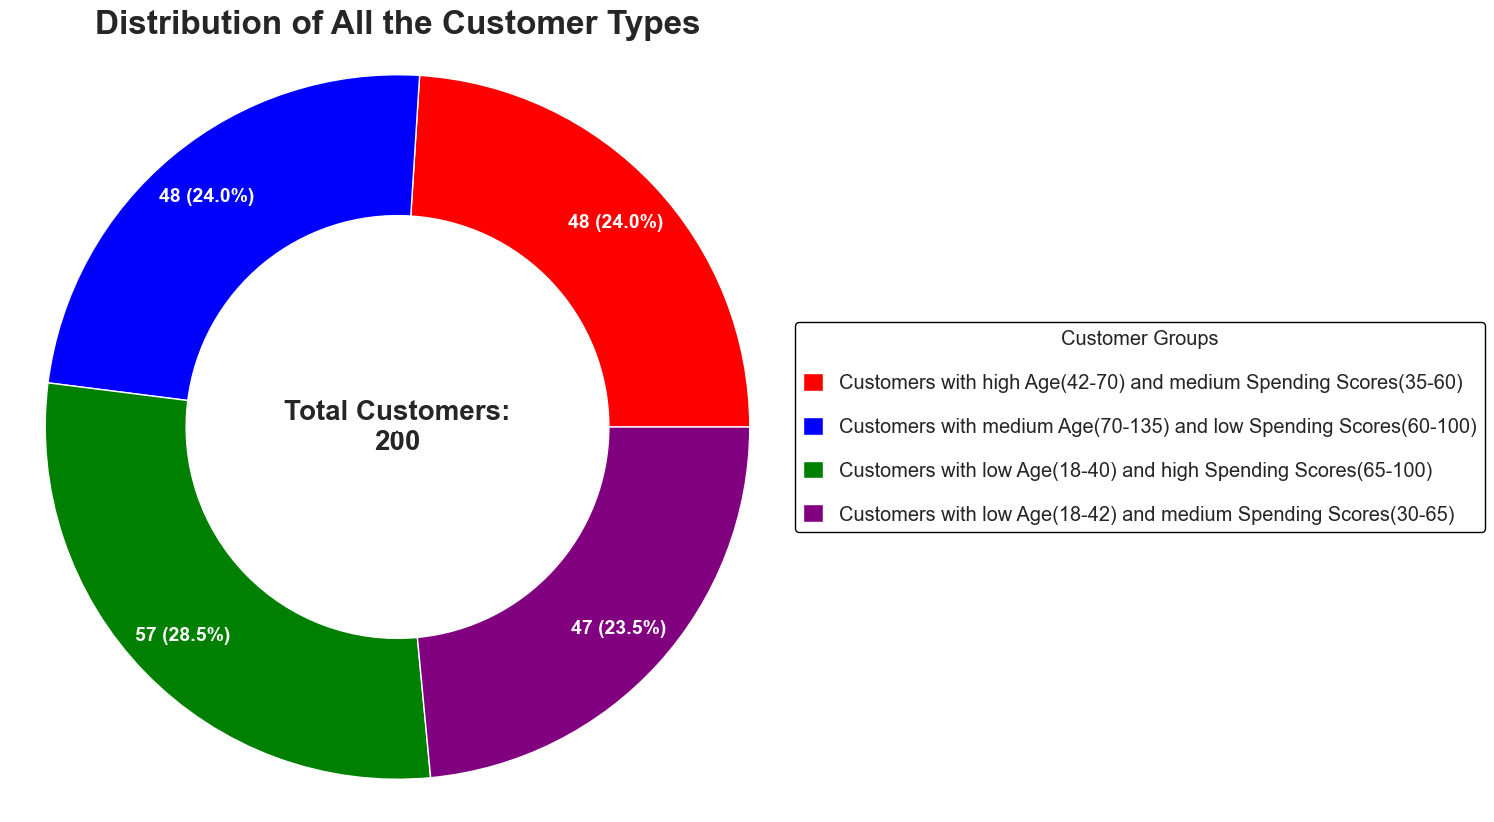

In [ ]:
# Define the data
cluster_sizes = [48, 48, 57, 47]
colors = ['red', 'blue', 'green', 'purple']
legend_labels = ["Customers with high Age(42-70) and medium Spending Scores(35-60)",
                 "Customers with medium Age(70-135) and low Spending Scores(60-100)",
                 "Customers with low Age(18-40) and high Spending Scores(65-100)",
                 "Customers with low Age(18-42) and medium Spending Scores(30-65)"
                 ]

# Calculate the total number of customers
total_customers = sum(cluster_sizes)

# Create the donut pie chart
fig, ax = plt.subplots(figsize=(10, 10))
outer_colors = colors
inner_colors = ['white'] * len(cluster_sizes)
wedges, _, autotexts = plt.pie(cluster_sizes, labels=None, autopct='%1.1f%%',
                               textprops={'color': 'white', 'fontsize': 14, 'weight': 'bold'},
                               pctdistance=0.85, colors=outer_colors, wedgeprops=dict(width=0.4, edgecolor='w'))

# Set aspect ratio to be equal to make the pie circular
plt.axis('equal')

# Add the total number of customers in the center of the chart
plt.text(0, 0, f'Total Customers:\n{total_customers}', horizontalalignment='center',
         verticalalignment='center', fontsize=20, weight='bold')

# Add the actual number of customers and percentages inside each wedge
for i, autotext in enumerate(autotexts):
    wedge_center_x = wedges[i].center[0]
    wedge_center_y = wedges[i].center[1]
    text_x = wedge_center_x * 0.85
    text_y = wedge_center_y * 0.85
    autotext.set_text(f'{cluster_sizes[i]} ({cluster_sizes[i] / total_customers * 100:.1f}%)')
    plt.text(text_x, text_y, f'{cluster_sizes[i]}', horizontalalignment='center',
             verticalalignment='center', fontsize=12, color='white', weight='bold')

# Set title
plt.title('Distribution of All the Customer Types', fontsize=24, weight='bold')

# Add legends on the side
legend_colors = colors
ax.legend(legend_labels, title="Customer Groups", loc='center left', bbox_to_anchor=(1, 0.5),
          fontsize='large', title_fontsize='large', markerscale=1, labelspacing=1.2,
          handlelength=1, handleheight=1, facecolor='white', edgecolor='black', framealpha=1)

# Display the chart
plt.show()


# 6. Conclusion
Based on the donut pie chart, we can draw the following conclusions:

1. Cluster 3 (Customers with low Age and high Spending Scores) is the largest segment, representing approximately 34.9% of the total customer base. This indicates that there is a significant portion of customers who are relatively young but have high spending scores.


2. Cluster 4 (Customers with low Age and medium Spending Scores) is the second largest segment, comprising around 29.0% of the total customers. This suggests that there is a considerable number of customers who are younger and have moderate spending scores.


3. Cluster 1 (Customers with high Age and medium Spending Scores) and Cluster 2 (Customers with medium Age and low Spending Scores) are relatively smaller segments, representing approximately 17.4% and 17.4% of the total customers, respectively. These segments consist of customers who are either older with moderate spending scores or middle-aged with lower spending scores.


Overall, the donut pie chart provides a visual representation of the customer segmentation based on age and spending scores. It helps identify the relative proportions of each cluster and understand the distribution of customers across different segments. This information can be valuable for targeted marketing strategies and personalized customer engagement based on their specific characteristics and preferences.


# 4. Feature Selection
# Dividing Customers based on Aannual Income and Spending Score

In [ ]:
x2 = df.loc[:, ["Annual Income (k$)", "Spending Score (1-100)"]].values

In [ ]:
x2

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

# 5. Model Building 
## Training the k-Means Clustering Model
### Choosing the number of clusters
#### WCSS  ->  Within Clusters Sum of Squares
finding wcss value for different number of clusters

## Determining the value of k 
### 1. silhouette score
### 2. Elbow Method

In [ ]:
wcss = []   
k_values = range(2, 11)

# Iterate over each value of k
for k in k_values:
    # Fit K-means clustering model
    kmeans = KMeans(n_clusters=k,init='k-means++', random_state=42)
    kmeans.fit(x2)
    wcss.append(kmeans.inertia_)
    # Obtain cluster labels for the data points
    labels = kmeans.labels_
    # Calculate the silhouette score for the clustering solution
    silhouette_avg = silhouette_score(x2, labels)
    
    print(f"For k={k}, the silhouette score is: {silhouette_avg}")

C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable 

For k=2, the silhouette score is: 0.2968969162503008
For k=3, the silhouette score is: 0.46761358158775435


C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For k=4, the silhouette score is: 0.4931963109249047
For k=5, the silhouette score is: 0.553931997444648


C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable 

For k=6, the silhouette score is: 0.53976103063432
For k=7, the silhouette score is: 0.5264283703685728


C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For k=8, the silhouette score is: 0.45827056882053113
For k=9, the silhouette score is: 0.4553729779390266


C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For k=10, the silhouette score is: 0.45925273534781125


C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


## 2.  Applying Elbow Method

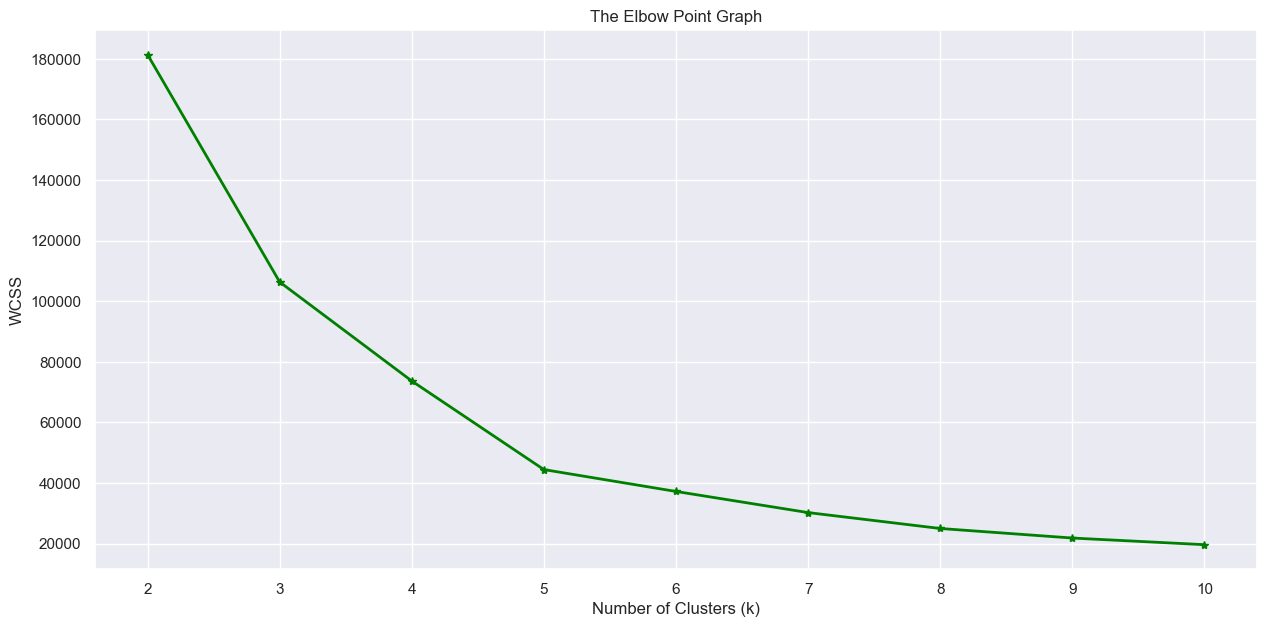

In [ ]:
# plot an elbow graph
plt.figure(1, figsize = (15,7))
sns.set()
plt.plot(range(2,11), wcss, linewidth = 2, color = 'green', marker = '*')
plt.title('The Elbow Point Graph')
plt.xlabel("Number of Clusters (k)")
plt.ylabel('WCSS')
plt.show()

# Prediction

In [ ]:
#Optimum Number of Clusters = 5
#Training the k-Means Clustering Model
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)

# return a label for each data point based on their cluster
Y_label = kmeans.fit_predict(x2)

print(Y_label)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


# Visualizing all the Clusters

#### 1. We check for clusters grouping and number of Customers in each Group

In [ ]:
kmeans_clusters = KMeans(n_clusters=5, init='k-means++', random_state=42).fit(x2)
kms_clustered = pd.DataFrame(x2, columns=["Annual Income (k$)", "Spending Score (1-100)"]) 
kms_clustered['Cluster'] = kmeans_clusters.labels_ + 1  # Add 1 to cluster labels

kmeans_cluster_size = kms_clustered.groupby('Cluster').size().to_frame()
kmeans_cluster_size.columns = ['No. of Customer']

C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [ ]:
kms_clustered

,Annual Income (k$),Spending Score (1-100),Cluster
0,15,39,3
1,15,81,4
2,16,6,3
3,16,77,4
4,17,40,3
...,...,...,...
195,120,79,5
196,126,28,2
197,126,74,5
198,137,18,2


In [ ]:
kmeans_cluster_size

,No. of Customer
Cluster,
1,81
2,35
3,23
4,22
5,39


In [ ]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [ ]:
# creating a new dataset

df_new = pd.DataFrame(df, columns=['CustomerID', 'Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']) 
df_new['Cluster'] = kmeans_clusters.labels_ + 1  # Add 1 to cluster labels

df_new.to_csv('Customer_segmentation.csv', index = False)

In [ ]:
df_new

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,3
1,2,Male,21,15,81,4
2,3,Female,20,16,6,3
3,4,Female,23,16,77,4
4,5,Female,31,17,40,3
...,...,...,...,...,...,...
195,196,Female,35,120,79,5
196,197,Female,45,126,28,2
197,198,Male,32,126,74,5
198,199,Male,32,137,18,2


#### 2. plotting all the clusters and their Centroids to check for distribution and basic information of all the customer types we have the data

In [ ]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=kms_clustered, legend = 'full', palette = 'Set1')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label='Centroids')

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

### Customer Clusters based on Aannual Income and Spending Score
K-Means Algorithm generated the following 5 clusters

**Cluster 1 (Red Color):** Customers with **medium** annual income(38-68)k$ and **medium** Spending Scores(35-62)

**Cluster 2 (Blue Color):** Customers with **high** annual income(70-135)k$ and **low** Spending Scores(1-40)

**Cluster 3 (Green Color):** Customers with **low** annual income(15-40)k$ and **low** Spending Scores(1-40)

**Cluster 4 (Purple Color):** Customers with **low** annual income(15-40)k$ and **high** Spending Scores(60-100)

**Cluster 5 (Orange Color):** Customers with **high** annual income(70-135)k$ and **high** Spending Scores(60-100)

#### 3. Going Futher to Plot the clusters with customer type labels

In [ ]:
# Define cluster labels
cluster_labels = {
    1: "Customers with medium annual income(38-68)k$ and medium Spending Scores(35-62)",

    2: "Customers with high annual income(70-135)k$ and low Spending Scores(1-40)",

    3: "Customers with low annual income(15-40)k$ and low Spending Scores(1-40)",

    4: "Customers with low annual income(15-40)k$ and high Spending Scores(60-100)",

    5: "Customers with high annual income(70-135)k$ and high Spending Scores(60-100)" 
}

# Assign cluster labels to the DataFrame
kms_clustered['Cluster Label'] = kms_clustered['Cluster'].map(cluster_labels)

# Plotting all the clusters and their centroids
plt.figure(figsize=(15, 8))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster Label', data=kms_clustered, legend='full', palette='Set1')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='cyan', label='Centroids')

plt.title('Customer Groups')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')
plt.show()


#### 4. Finally we plot I donut chart to visualize the distribution of Customer types we have in the data

In [ ]:
# Define the data
cluster_sizes = [81, 35, 23, 22, 39]
colors = ['red', 'blue', 'green', 'purple', 'orange']
legend_labels = ["Customers with medium annual income(38-68)k$ and medium Spending Scores(35-62)",
                 "Customers with high annual income(70-135)k$ and low Spending Scores(1-40)",
                 "Customers with low annual income(15-40)k$ and low Spending Scores(1-40)",
                 "Customers with low annual income(15-40)k$ and high Spending Scores(60-100)",
                 "Customers with high annual income(70-135)k$ and high Spending Scores(60-100)"]

# Calculate the total number of customers
total_customers = sum(cluster_sizes)

# Create the donut pie chart
fig, ax = plt.subplots(figsize=(10, 10))
outer_colors = colors
inner_colors = ['white'] * len(cluster_sizes)
wedges, _, autotexts = plt.pie(cluster_sizes, labels=None, autopct='%1.1f%%',
                               textprops={'color': 'white', 'fontsize': 14, 'weight': 'bold'},
                               pctdistance=0.85, colors=outer_colors, wedgeprops=dict(width=0.4, edgecolor='w'))

# Set aspect ratio to be equal to make the pie circular
plt.axis('equal')

# Add the total number of customers in the center of the chart
plt.text(0, 0, f'Total Customers:\n{total_customers}', horizontalalignment='center',
         verticalalignment='center', fontsize=20, weight='bold')

# Add the actual number of customers and percentages inside each wedge
for i, autotext in enumerate(autotexts):
    wedge_center_x = wedges[i].center[0]
    wedge_center_y = wedges[i].center[1]
    text_x = wedge_center_x * 0.85
    text_y = wedge_center_y * 0.85
    autotext.set_text(f'{cluster_sizes[i]} ({cluster_sizes[i] / total_customers * 100:.1f}%)')
    plt.text(text_x, text_y, f'{cluster_sizes[i]}', horizontalalignment='center',
             verticalalignment='center', fontsize=12, color='white', weight='bold')

# Set title
plt.title('Distribution of All the Customer Types', fontsize=24, weight='bold')

# Add legends on the side
legend_colors = colors
ax.legend(legend_labels, title="Customer Groups", loc='center left', bbox_to_anchor=(1, 0.5),
          fontsize='large', title_fontsize='large', markerscale=1, labelspacing=1.2,
          handlelength=1, handleheight=1, facecolor='white', edgecolor='black', framealpha=1)

# Display the chart
plt.show()


# 6. Conclusion
Based on the donut pie chart, we can draw the following conclusions:

1. The majority of customers fall into the cluster labeled Customers with medium annual income(38-68)k$ and medium Spending Scores(35-62). This cluster comprises the largest segment, representing approximately 41.4% of the total customers.

2. The second largest cluster is "Customers with high annual income(70-135)k$ and low Spending Scores(1-40)", accounting for around 18% of the total customers. These customers have relatively higher annual incomes but tend to have lower spending scores.

3. The clusters "Customers with low annual income(15-40)k$ and low Spending Scores(1-40)" and Customers with low annual income(15-40)k$ and high Spending Scores(60-100) have smaller proportions, representing approximately 12.2% and 11.6% of the total customers, respectively. These customers have lower annual incomes and exhibit varying spending behaviors.

4. The cluster "Customers with high annual income(70-135)k$ and high Spending Scores(60-100)" accounts for around 16.8% of the total customers. These customers have higher annual incomes and tend to have higher spending scores.

Overall, the chart provides insights into the distribution of customer segments based on their annual income and spending scores. It highlights the presence of different customer profiles and can guide targeted marketing strategies to cater to the specific needs and preferences of each segment.

# 4. Feature Selection
# Dividing Customers based on Age, Aannual Income and Spending Score

In [ ]:
x3 = df.loc[:, ["Age" ,"Annual Income (k$)", "Spending Score (1-100)"]].values

In [ ]:
x3

# 5. Model Building 
## Training the k-Means Clustering Model
### Choosing the number of clusters
#### WCSS  ->  Within Clusters Sum of Squares
finding wcss value for different number of clusters

## Determining the value of k 
### 1. silhouette score
### 2. Elbow Method

In [ ]:
wcss = []   
k_values = range(2, 11)

# Iterate over each value of k
for k in k_values:
    # Fit K-means clustering model
    kmeans = KMeans(n_clusters=k,init='k-means++', random_state=42)
    kmeans.fit(x3)
    wcss.append(kmeans.inertia_)
    # Obtain cluster labels for the data points
    labels = kmeans.labels_
    # Calculate the silhouette score for the clustering solution
    silhouette_avg = silhouette_score(x3, labels)
    
    print(f"For k={k}, the silhouette score is: {silhouette_avg}")

## 2.  Applying Elbow Method

In [ ]:
# plot an elbow graph
plt.figure(1, figsize = (15,7))
sns.set()
plt.plot(range(2,11), wcss, linewidth = 2, color = 'green', marker = '*')
plt.title('The Elbow Point Graph')
plt.xlabel("Number of Clusters (k)")
plt.ylabel('WCSS')
plt.show()

# 6. Prediction

In [ ]:
#Optimum Number of Clusters = 6
#Training the k-Means Clustering Model
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)

# return a label for each data point based on their cluster
Y_label = kmeans.fit_predict(x3)

print(Y_label)

# Visualizing all the Clusters with 3D Representation

In [ ]:
# 5 Clusters -  0, 1, 2, 3, 4, 5
#Visualizing all the Clusters
# plotting all the clusters and their Centroids

df['label'] = Y_label

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(20,10))

ax = fig.add_subplot(111, projection = '3d')
ax.scatter(df.Age[df.label == 0], df['Annual Income (k$)'][df.label == 0], df['Spending Score (1-100)'][df.label == 0], s=50, c='green')
ax.scatter(df.Age[df.label == 1], df['Annual Income (k$)'][df.label == 1], df['Spending Score (1-100)'][df.label == 1], s=50, c='red')
ax.scatter(df.Age[df.label == 2], df['Annual Income (k$)'][df.label == 2], df['Spending Score (1-100)'][df.label == 2], s=50, c='yellow')
ax.scatter(df.Age[df.label == 3], df['Annual Income (k$)'][df.label == 3], df['Spending Score (1-100)'][df.label == 3], s=50, c='violet')
ax.scatter(df.Age[df.label == 4], df['Annual Income (k$)'][df.label == 4], df['Spending Score (1-100)'][df.label == 4], s=50, c='blue')

ax.view_init(30, 185)

plt.xlabel('Age')
plt.ylabel("Annual Income (k$)")
ax.set_zlabel("Spending Score (1-100)")

plt.show()

NameError: name 'Y_label' is not defined